<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bootstrap" data-toc-modified-id="Bootstrap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bootstrap</a></span></li><li><span><a href="#Statistical-property-of-[mean-of-the-N-numbers]" data-toc-modified-id="Statistical-property-of-[mean-of-the-N-numbers]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical property of [mean of the N numbers]</a></span><ul class="toc-item"><li><span><a href="#Generating-N-random-numbers" data-toc-modified-id="Generating-N-random-numbers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generating N random numbers</a></span></li><li><span><a href="#By-theory" data-toc-modified-id="By-theory-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>By theory</a></span></li><li><span><a href="#Or,-doing-monate-carlo,-because-we-know-how-the-N-numbers-were-generated!" data-toc-modified-id="Or,-doing-monate-carlo,-because-we-know-how-the-N-numbers-were-generated!-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Or, doing monate carlo, because we know how the N numbers were generated!</a></span></li><li><span><a href="#Or,-we-can-bootstrap-with-original-sample" data-toc-modified-id="Or,-we-can-bootstrap-with-original-sample-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Or, we can bootstrap with original sample</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span><ul class="toc-item"><li><span><a href="#Generating-N-numbers" data-toc-modified-id="Generating-N-numbers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Generating N numbers</a></span></li><li><span><a href="#Parameter-estimation" data-toc-modified-id="Parameter-estimation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parameter estimation</a></span></li><li><span><a href="#Error-of-the-estimation" data-toc-modified-id="Error-of-the-estimation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Error of the estimation</a></span></li><li><span><a href="#Using-bootstrap!" data-toc-modified-id="Using-bootstrap!-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Using bootstrap!</a></span></li><li><span><a href="#Variance-of-the-error" data-toc-modified-id="Variance-of-the-error-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Variance of the error</a></span></li></ul></li><li><span><a href="#Appendix:-Estimators" data-toc-modified-id="Appendix:-Estimators-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Appendix: Estimators</a></span></li></ul></div>

# Bootstrap


Bootstrapping can estimate confidence intervals and variances because it generates the sampling distribution of an estimator by resampling the original sample data, with replacement, to create multiple "artificial" samples. This allows us to estimate the distribution of the estimator without making any assumptions about the underlying population distribution. The bootstrapped estimator distribution can be used to calculate confidence intervals and variances, such as the 2.5th and 97.5th percentiles for a confidence interval or the variance of the bootstrapped estimator distribution. This provides a robust and flexible method for statistical inference, especially when traditional methods are not applicable or the population distribution is unknown.
                        --- ChatGPT Default(GPT-3.5) Mar 23 Version


 # Statistical property of [mean of the N numbers]
 
 The mean of a set of N numbers is a statistical property that represents the average value of the dataset.

## Generating N random numbers

In [25]:
%matplotlib inline                   
import numpy as np                    # import the numpy library for numerical computing
import matplotlib.pyplot as plt       # import the matplotlib library for visualizations
import pandas as pd
from IPython.display import display, HTML

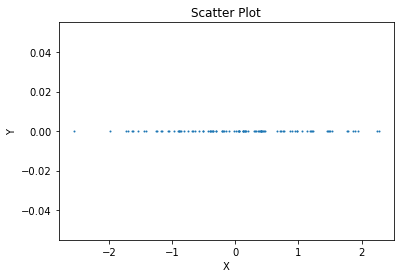

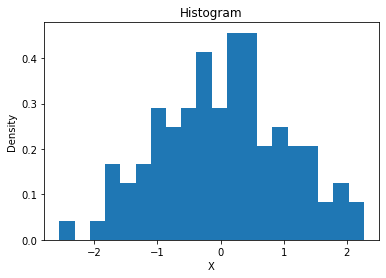

In [12]:
N = 100                               # set the number of data points to be generated
np.random.seed(0)                     # set the random seed to ensure reproducibility
X = np.random.randn(N)                # generate N random numbers from a standard normal distribution

# create a scatter plot of X on the x-axis and an array of zeros on the y-axis with marker size 1
plt.scatter(X, np.zeros(N), s=1)      
plt.xlabel('X')                       # add x-axis label
plt.ylabel('Y')                       # add y-axis label
plt.title('Scatter Plot')             # add plot title
plt.show()                            # display the plot

# create a histogram of X with normalized density
plt.hist(X, density=True, bins=20)             
plt.xlabel('X')                       # add x-axis label
plt.ylabel('Density')                 # add y-axis label
plt.title('Histogram')                # add plot title
plt.show()                            # display the plot

## By theory

Here's the math behind the calculation of the mean and standard deviation of the mean of `N` numbers using LaTeX:

Let $X$ be a set of $N$ random variables, each with mean $\mu$ and standard deviation $\sigma$. The sample mean is defined as:

$$
\overline{X} = \frac{X_1 + X_2 + \cdots + X_N}{N}
$$

The expected value of the sample mean is:

\begin{align*}
E[\overline{X}] &= E\left[\frac{X_1 + X_2 + \cdots + X_N}{N}\right] \\
                &= E\left[\frac{X_1}{N} + \frac{X_2}{N} + \cdots + \frac{X_N}{N}\right] &&\text{(by linearity of expectation)} \\
                &= E\left[\frac{X_1}{N}\right] + E\left[\frac{X_2}{N}\right] + \cdots + E\left[\frac{X_N}{N}\right] \\
                &= \frac{\mu}{N} + \frac{\mu}{N} + \cdots + \frac{\mu}{N} \\
                &= \mu
\end{align*}

Therefore, the expected value of the sample mean is equal to the population mean $\mu$.

The variance of the sample mean is:

\begin{align*}
\text{Var}[\overline{X}] &= \text{Var}\left[\frac{X_1 + X_2 + \cdots + X_N}{N}\right] \\
                          &= \text{Var}\left[\frac{X_1}{N} + \frac{X_2}{N} + \cdots + \frac{X_N}{N}\right] &&\text{(by linearity of variance)} \\
                          &= \frac{1}{N^2} \left(\text{Var}[X_1] + \text{Var}[X_2] + \cdots + \text{Var}[X_N]\right) &&\text{(by independence)} \\
                          &= \frac{\sigma^2}{N}
\end{align*}

Therefore, the variance of the sample mean is equal to the population variance $\sigma^2$ divided by $N$.

The standard deviation of the sample mean is:

\begin{align*}
\text{Stdev}[\overline{X}] &= \sqrt{\text{Var}[\overline{X}]} \\
                            &= \sqrt{\frac{\sigma^2}{N}} \\
                            &= \frac{\sigma}{\sqrt{N}}
\end{align*}

Therefore, the standard deviation of the sample mean is equal to the population standard deviation $\sigma$ divided by the square root of $N$.

In [31]:
df = pd.DataFrame({
    "Statistic": ["The Theoretical expected value of sample mean",
                  "The theoretical stdev of the sample mean"],
    "Value": [0, 1/np.sqrt(N)]
})
display(HTML(df.to_html(index=False, col_space='150px')))

Statistic,Value
The Theoretical expected value of sample mean,0.0
The theoretical stdev of the sample mean,0.1


## Estimating Expected Value and Standard Deviation of Sample Mean through Monte Carlo Simulation


We know the exact distribution of the N numbers generated, the Central Limit Theorem still applies. Therefore, we can use Monte Carlo simulation to estimate the expected value and standard deviation of the sample mean by generating a large number of random samples of size N, calculating the sample mean for each sample, and then estimating the mean and standard deviation of the sample means across all the samples. This approach converges to the true values as the number of samples increases

In [29]:
np.random.seed(234)                      # set the random seed for reproducibility
Xs = np.random.randn(100000, N)          # generate 100,000 rows of N normally distributed random numbers
rmeans = np.mean(Xs, axis=1)             # calculate the sample mean of each row
rmean = np.mean(rmeans)                  # calculate the mean of the sample means
rstddev = np.std(rmeans, ddof=1)         # calculate the standard deviation of the sample means

df = pd.DataFrame({
    "Statistic": ["Monte Carlo estimated mean of sample means", "Monte Carlo estimated stdev of sample means"],
    "Value": [rmean, rstddev]
})
display(HTML(df.to_html(index=False)))


Statistic,Value
Monte Carlo estimated mean of sample means,0.000043
Monte Carlo estimated stdev of sample means,0.100202


## Alternatively, we can perform bootstrapping using the original sample

Bootstrapping is a statistical technique that involves resampling with replacement from a single original dataset to estimate the variability of a statistic of interest. In the context of the code, we can alternatively perform bootstrapping using the original sample of 100 data points generated from a standard normal distribution to estimate the expected value and standard deviation of the sample mean. However, it is important to keep in mind that the results of bootstrapping are based on the assumptions that the original sample is representative of the population, and that the variability of the sample statistic is similar to the variability of the population statistic

In [30]:
np.random.seed(234)                         # set the random seed for reproducibility
sample = np.random.choice(X, size=[100000, N], replace=True)   # bootstrap with the original sample to generate 100,000 new samples
bmeans = np.mean(sample, axis=1)             # calculate the sample mean of each bootstrapped sample
bmean = np.mean(bmeans)                      # calculate the mean of the bootstrapped sample means
bstddev = np.std(bmeans, ddof=1)              # calculate the standard deviation of the bootstrapped sample means

# create dataframe with the statistics and values
df = pd.DataFrame({
    "Statistic": ["Bootstrap estimated mean of sample means", "Bootstrap estimated stdev of sample means"],
    "Value": [bmean, bstddev]
})

# display the dataframe using IPython display
display(HTML(df.to_html(index=False)))


Statistic,Value
Bootstrap estimated mean of sample means,0.060647
Bootstrap estimated stdev of sample means,0.100980


## Comparison

This code generates a table that displays the theoretical, Monte Carlo estimated, and bootstrap estimated expected value and standard deviation of the sample mean, based on the Central Limit Theorem. The code also plots the theoretical PDF and the PDFs estimated through Monte Carlo simulation and bootstrapping. The PDFs show the distribution of the sample mean for each method, and the plots are consistent with the expected values and standard deviations estimated through the different methods.



Statistic,Value
Theoretical expected value of sample mean,0.000000
Theoretical standard deviation of sample mean,0.100000
Monte Carlo estimated expected value of sample mean,0.000043
Monte Carlo estimated standard deviation of sample mean,0.100202
Bootstrap estimated expected value of sample mean,0.060647
Bootstrap estimated standard deviation of sample mean,0.100980


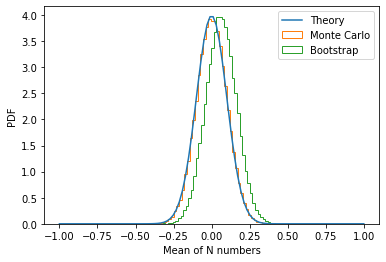

In [39]:
# calculate theoretical expected value and standard deviation
np.random.seed(234)
th_mean = 0
th_stddev = 1/np.sqrt(N)

# perform Monte Carlo simulation to estimate expected value and standard deviation
np.random.seed(234)
Xs = np.random.randn(100000, N)
rmeans = np.mean(Xs, axis=1)
rmean = np.mean(rmeans)
rstddev = np.std(rmeans, ddof=1)

# perform bootstrapping to estimate expected value and standard deviation
np.random.seed(234)
sample = np.random.choice(X, size=[100000, N], replace=True)
bmeans = np.mean(sample, axis=1)
bmean = np.mean(bmeans)
bstddev = np.std(bmeans, ddof=1)

# create dataframe with the statistics and values
df = pd.DataFrame({
    "Statistic": ["Theoretical expected value of sample mean", "Theoretical standard deviation of sample mean",
                  "Monte Carlo estimated expected value of sample mean", "Monte Carlo estimated standard deviation of sample mean",
                  "Bootstrap estimated expected value of sample mean", "Bootstrap estimated standard deviation of sample mean"],
    "Value": [th_mean, th_stddev, rmean, rstddev, bmean, bstddev]
})

# display the dataframe using IPython display
display(HTML(df.to_html(index=False)))

# plot the PDFs
plt.plot(np.linspace(-1, 1, 100), 1/np.sqrt(2*np.pi)/th_stddev*np.exp(-np.linspace(-1, 1, 100)**2/(2*th_stddev**2)), label="Theory")
plt.hist(rmeans, density=True, histtype='step', label="Monte Carlo", bins=50)
plt.hist(bmeans, density=True, histtype='step', label="Bootstrap", bins=50)
plt.legend()
plt.xlabel("Mean of N numbers")
plt.ylabel("PDF")
plt.show()


The Monte Carlo method will reach the theoretical results as the number of samples generated increases. On the other hand, for the bootstrap, the expected value of the sample mean is close to the true value of zero. However, we cannot gain any more useful information than simply averaging over the sample. Nonetheless, the standard deviation of the sample mean is very close to the true value, and this result is not trivial. It is important to note that the standard deviation of the sample is not the same as the standard deviation of the sample mean. The latter is much smaller and harder to estimate accurately

# Exercise

## Generating N numbers

We can estimate the expectation and standard deviation

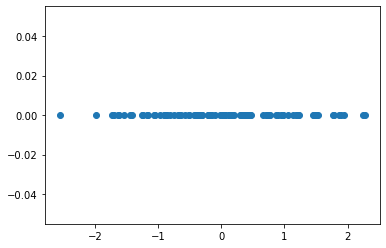

In [41]:
def data_of_unkonw_distribution():
    np.random.seed(0)
    N = 100
    X = np.random.randn(N) + np.random.rand(N) - 0.5
    return X

    X = data_of_unkonw_distribution()


plt.scatter(X, np.zeros(N))
plt.show()


## Parameter estimation

In [42]:
mean = np.mean(X)
stddev = np.std(X, ddof=1)
print("  mean = %.3f" % (mean))
print("stddev = %.3f" % (stddev))

  mean = 0.060
stddev = 1.013


## Error of the estimation
We can estimate the error of mean. But how to estimate the error of stddev?
we can't do monte carlo, because we have don't the exact distribution of the data.

In [8]:
print("  mean = %.3f +- %.3f"%(mean,stddev/np.sqrt(N)))
print("stddev = %.3f +- ?"%(stddev))

  mean = 0.060 +- 0.101
stddev = 1.013 +- ?


## Using bootstrap!

In [9]:
np.random.seed(234)
sample = np.random.choice(X, size=[1000000, N], replace=True)
bmeans = np.mean(sample, axis=1)
bstddevs = np.std(sample, axis=1, ddof=1)

bmeanstddev = np.std(bmeans, ddof=1)
bstddevstddev = np.std(bstddevs, ddof=1)

print("bootstrap 1 sigma error of mean    = %f" % (bmeanstddev))
print("bootstrap 1 sigma error of stddev  = %f" % (bstddevstddev))

bootstrap 1 sigma error of mean    = 0.100781
bootstrap 1 sigma error of stddev  = 0.064653


Wow, the 1 sigma error of mean is closed to the one of theory!
This let use be very confident that standard deviation is also closed to the one of theory!

## Variance of the error

We are lucky there is a formula to calculate the variance of the variance estimator, ${\rm Var}(\hat{\sigma^2})$, in theory. Then we known the standard deviation of the variance estimator, ${\rm Std}[\hat{\sigma^2}]$.
At the first order approximation, we can the calculate the standard deviation of square root of the variance estimator by
$$
{\rm Std}[\sqrt{\hat{\sigma^2}}] \approx \frac{{\rm Std}[\hat{\sigma^2}]}{2\hat{\sigma}}
$$

In [10]:
def estimate_std_of_std(X):
    n = X.shape[0]
    mean = np.mean(X)
    sigma2 = np.sum((X - mean)**2)/(n-1)
    mu_4 = np.mean((X - mean)**4)
    sigma = np.sqrt(sigma2)
    sigma4 = sigma2 *sigma2
    # although sigma2 is unbias, sigma4 is still bias, but it's OK
    var_of_var = mu_4 / n - sigma2**2 * (n - 3) / (n * (n - 1))
    std_of_std = np.sqrt(var_of_var) / (2 * sigma)
    return std_of_std


print(estimate_std_of_std(X))

0.06385819057430948


# Appendix: Estimators


|  <div style="width:150px">  </div> |<div style="width:150px"> symbol </div> |  <div style="width:150px"> formula </div>| comments|
|   :---   |   :---:   |   :---:   |   :---   |
| Expectation/Mean | $\mu$ | $E[x]$ | The expected value or average value of a variable |
| Variance | $\sigma^2$ | $E[(x-\mu)^2]$ | A measure of how spread out the values of a variable are |
| Fourth Central Moment | $\mu_4$ | $E[(x-\mu)^4]$ | A measure of how heavy the tails of the distribution of a variable are |
| Estimator of Mean/sample mean | $\hat{\mu}$ | $\frac{1}{n} \sum_i x_i$ | Unbiased |
| Estimator of Variance | $\hat{\sigma^2}$ | $\frac{1}{n-1}\sum_i (x_i - \hat{\mu})^2$ | Unbiased |
| Estimator of $\mu_4$ | $\hat{\mu_4}$ | $\frac{1}{n}\sum_i (x_i - \hat{\mu})^4$ |Generally biased (2) |
| Variance of the sample mean | ${\rm Var}[\hat{\mu}]$ | $\frac{\sigma^2}{n}$ |  |
| Variance of Estimator of Variance | ${\rm Var}[\hat{\sigma^2}]$ | $ {\mu_4\over n}-{\sigma^4\,(n-3)\over n\,(n-1)} $ | (1) |


I initially derived equation (1) using the results from a reputable publication. Unfortunately, I have since forgotten the name of the publication. However, I found an online proof provided by others at the following link: https://math.stackexchange.com/questions/72975/variance-of-sample-variance.

(2) is generally biased. For unbiased and more results, refer to  
Mathematical Statistics with Mathematica, Chapter 7 – Moments of Sampling Distributions (http://www.mathstatica.com/book/Rose_and_Smith_2002edition_Chapter7.pdf )
